In [1]:
import train
from common.drawutils import *
from osgeo import gdal
import run
import matplotlib.pyplot as plt
import pandas as pd

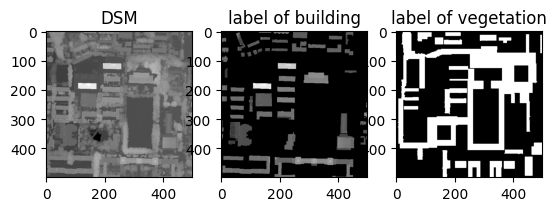

In [71]:
#In this cell, we show a monk data include a dsm tif, which is one band tif, record the altitude of each raster
b_label = gdal.Open('map/dsm_building.tif')
t_label = gdal.Open('map/dsm_vegetation.tif')
dsm = gdal.Open('map/dsm.tif')

fdsm = dsm.GetRasterBand(1).ReadAsArray(0,0,500,500)
fb = b_label.GetRasterBand(1).ReadAsArray(0,0,500,500)
ft = t_label.GetRasterBand(1).ReadAsArray(0,0,500,500)
fig, axs = plt.subplots(1, 3)
axs[0].imshow(fdsm, cmap='gray')
axs[0].set_title('DSM')
axs[1].imshow(fb, cmap='gray')
axs[1].set_title('label of building')
axs[2].imshow(ft, cmap='gray')
axs[2].set_title('label of vegetation')
plt.savefig('map/mock_data.png')

In [2]:
opt = train.parse_opt(True, algorithm='RDDPG', epoch=250, task='task21', statetype='image3c')
logPath_RDDPG = train.train(opt)

100%|██████████| 250/250 [2:30:39<00:00, 36.16s/it]  

best_epreward: 127.94961166381836


In [93]:
# testing model
opt = run.parse_opt(True,  algorithm='RDDPG', modelname=logPath_RDDPG+'final.pt', net='resnet18', task='task21', statetype='image3c')
run.test(opt)

ep_reward: 122.8907561302185


'RDDPG_1721226111final'

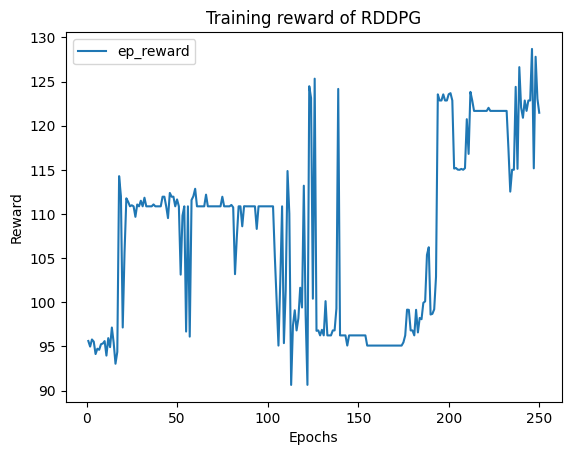

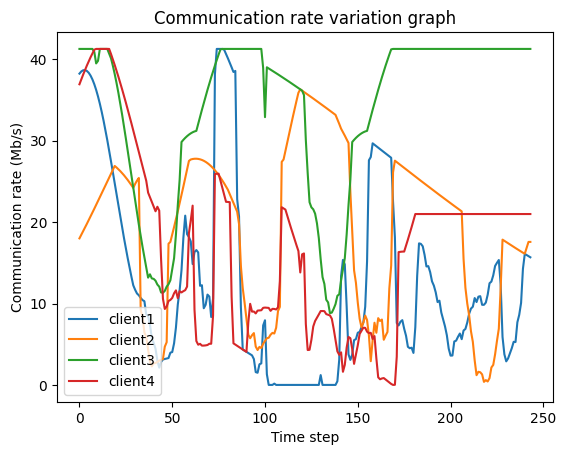

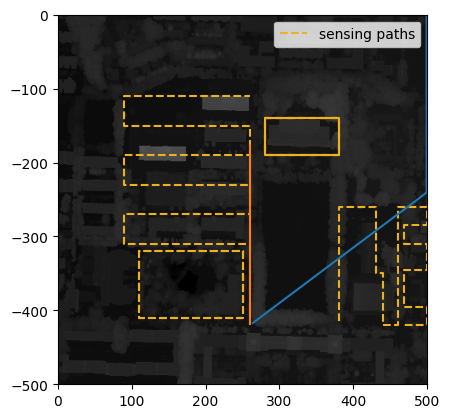

In [92]:
logPath_RDDPG = 'RDDPG_1721226111'
drawTrainingReward(logPath_RDDPG, 'RDDPG')
drawClientsRateChangeLine(logPath_RDDPG+ 'final')
drawRadiosTrace(logPath_RDDPG+'final')

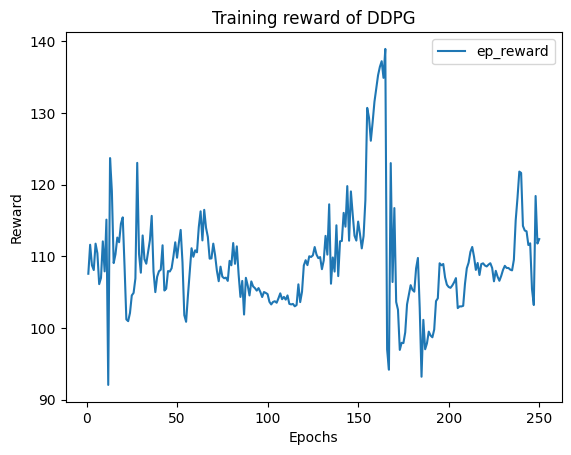

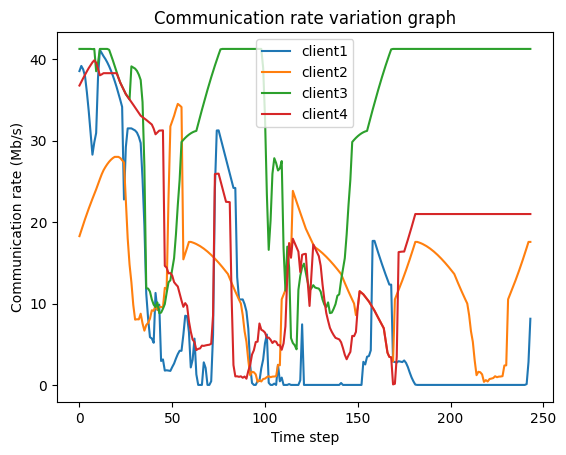

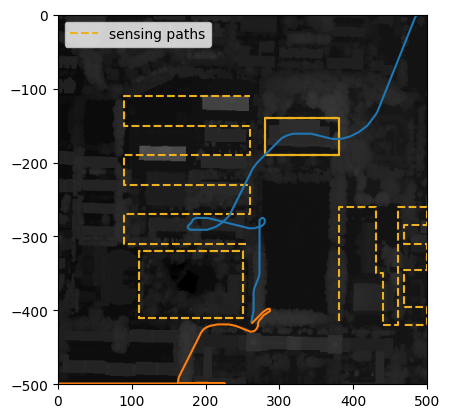

In [91]:
logPath_DDPG = 'DDPG_1721269024'
drawTrainingReward(logPath_DDPG, 'DDPG')
drawClientsRateChangeLine(logPath_DDPG+'final')
drawRadiosTrace(logPath_DDPG+'final')

ep_reward: 89.23619367182255


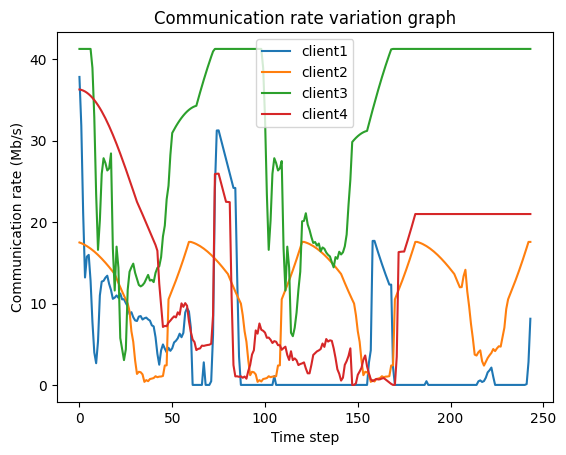

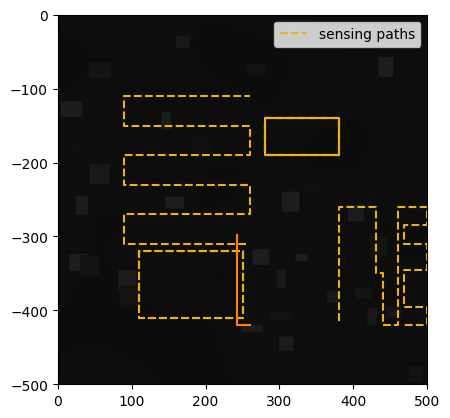

In [15]:
opt = run.parse_opt(True, algorithm='center', task='task21')
analyseLogPath_center = run.test(opt)
drawClientsRateChangeLine(analyseLogPath_center)
drawRadiosTrace(analyseLogPath_center)

ep_reward: 86.40455229580402


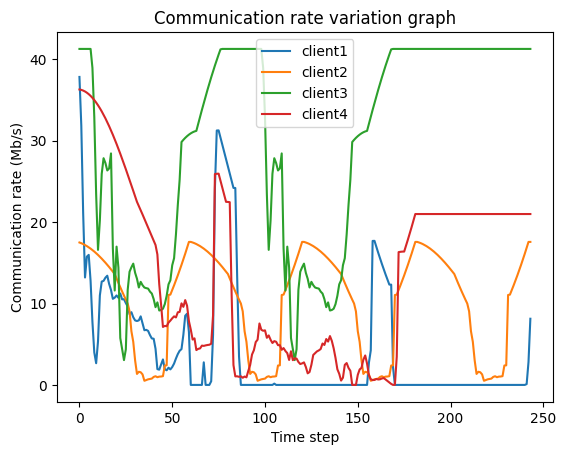

In [16]:
opt = run.parse_opt(True, algorithm='withoutRadio', task='task21')
analyseLogPath_wr = run.test(opt)
drawClientsRateChangeLine(analyseLogPath_wr)

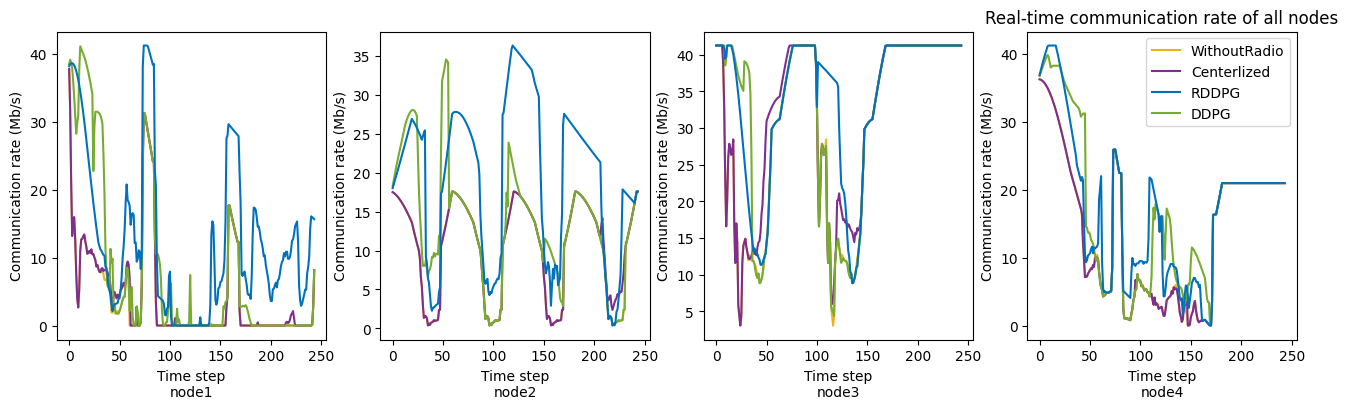

In [77]:
loglists = [analyseLogPath_wr, analyseLogPath_center,logPath_DDPG, logPath_RDDPG]
drawClientsRateCompare(loglists)

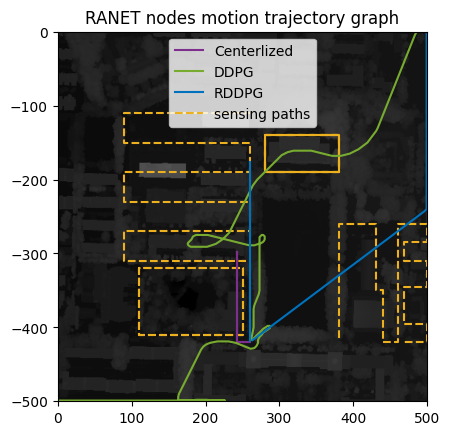

In [95]:
loglists = [analyseLogPath_center,logPath_DDPG+'final', logPath_RDDPG+'final']
drawRadiosTraceCompare(loglists)

In [94]:
loglists = [analyseLogPath_wr, analyseLogPath_center,logPath_DDPG+'final', logPath_RDDPG+'final']
data = calMeanRate(loglists)
ave = np.mean(data, axis=0)
data = np.vstack((data, ave))
row_names = ['Node 1', 'Node 2', 'Node 3', 'Node 4', 'mean']
column_names = ['Without RANET node', 'Centralized deployment', 'DDPG', 'RDDPG']
df = pd.DataFrame(data, index=row_names, columns=column_names)
df

,Without RANET node,Centralized deployment,DDPG,RDDPG
Node 1,4.367007,4.618266,8.315797,12.712093
Node 2,10.277091,10.528955,13.332603,19.258530
Node 3,29.923739,31.324516,32.399773,33.991391
Node 4,13.899858,13.912054,17.559128,17.194938
mean,14.616924,15.095948,17.901825,20.789238
